In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [2]:
Real = pd.read_csv("True.csv")
Fake = pd.read_csv("Fake.csv")

# Data Preprocessing

In [3]:
Real.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
Fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
Real['news_category'] = 1
Fake['news_category'] = 0

Let's combine both the datasets

In [6]:
data = pd.concat([Real, Fake])

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)

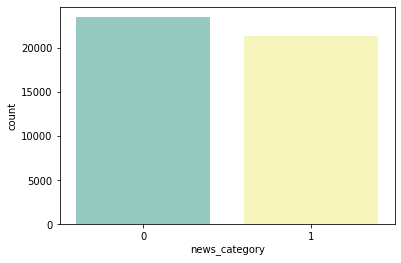

In [8]:
sns.countplot(x = data.news_category, palette="Set3")

In [9]:
data.news_category.value_counts()

0    23481
1    21417
Name: news_category, dtype: int64

From the above plot and result of value_counts we see that the data is balanced

In [10]:
data.isna().sum()

title            0
text             0
subject          0
date             0
news_category    0
dtype: int64

No missing values exist

In [11]:
data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

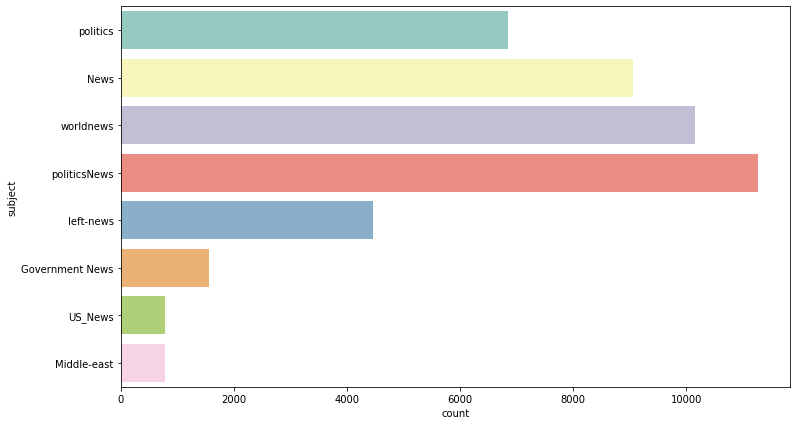

In [12]:
plt.figure(figsize = (12, 7))
sns.countplot(y=data.subject, palette="Set3")

### Combining title and text column 

In [13]:
data['text'] = data['title'] + " " + data['text']

In [14]:
data.head()

,title,text,subject,date,news_category
11090,ANOTHER WIN FOR TRUMP! Release Of Americans Ja...,ANOTHER WIN FOR TRUMP! Release Of Americans Ja...,politics,"Apr 21, 2017",0
8299,REVEALED: One Of Hillary Clinton’s Goldman Sa...,REVEALED: One Of Hillary Clinton’s Goldman Sa...,News,"February 6, 2016",0
12302,Merkel says good chance to start next phase of...,Merkel says good chance to start next phase of...,worldnews,"December 14, 2017",1
2009,Republican Has Epiphany: ‘Wracking My Brain T...,Republican Has Epiphany: ‘Wracking My Brain T...,News,"March 25, 2017",0
4261,"In abrupt shift, Trump warms to China and NATO...","In abrupt shift, Trump warms to China and NATO...",politicsNews,"April 13, 2017",1


In [15]:
del data['title']
del data['subject']
del data['date']

In [16]:
data.head()

,text,news_category
11090,ANOTHER WIN FOR TRUMP! Release Of Americans Ja...,0
8299,REVEALED: One Of Hillary Clinton’s Goldman Sa...,0
12302,Merkel says good chance to start next phase of...,1
2009,Republican Has Epiphany: ‘Wracking My Brain T...,0
4261,"In abrupt shift, Trump warms to China and NATO...",1


In [17]:
import nltk
import re
import sklearn

# Do not run below cells

### Case Conversion

In [18]:
data['text'] = data['text'].str.lower()

In [21]:
#data.head(2)

### Removing html tags - not needed

### Remove accented characters

In [25]:
import unicodedata

def remove_accented_char(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [26]:
data['text'] = data['text'].apply(remove_accented_char)

In [29]:
pd.set_option('display.max_colwidth', 50)
data.head()

,text,news_category
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


### Remove numbers, symbols and special characters - keep numbers or no?

In [31]:
import re

def remove_sym_specialchar(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'', text)
    return text

#remove numbers too
#def remove_num_sym_specialchar(text, remove_digits = False):
#    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
#    text = re.sub(pattern,'', text)
#    return text

In [32]:
data['text'] = data['text'].apply(remove_sym_specialchar)

In [38]:
#pd.set_option('display.max_colwidth', 500)
data.head()

,text,news_category
0,as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracin...,1
1,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered by federal courts the pentagon said on friday after president donald trumps administration decided not to appeal rulings that blocked his transgender ban two federal appeals courts one in washington and one in virginia last week rejected the administrations request to put on hold orders by lower cour...,1
2,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trumps 2016 election campaign should continue without interference in 2018 despite calls from some trump administration allies and republican lawmakers to shut it down a prominent republican senator said on sunday lindsey graham who serves on the senate armed forces and judiciary committees said department of justice special counsel robert mueller...,1
3,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may 2016 that russia had political dirt on democratic presidential candidate hillary clinton the new york times reported on saturday the conversation between papadopoulos and the diplomat alexander downer in london was a driving factor behind the fbis decision to open a counterintelligence investigation of moscows contacts with the trump camp...,1
4,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge much more to ship packages for amazon amzno picking another fight with an online retail giant he has criticized in the past why is the united states post office which is losing many billions of dollars a year while charging amazon and others so little to deliver their packages making amazon richer and the post office dum...,1


### Expanding contractions (I'd -> I would) - needed?, if yes, should come before symbols are removed?

In [39]:
!pip install contractions 
!pip install textsearch

     |████████████████████████████████| 238 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 312 kB 10.4 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp37-cp37m-macosx_10_9_x86_64.whl size=29364 sha256=2ad7f6ee3f5a82550cfacb9afb0f9780b162aae4493f021f748103f0874b9ade
  Stored in directory: /Users/kavitasurasura/Library/Caches/pip/wheels/9b/6b/f7/62dc8caf183b125107209c014e78c340a0b4b7b392c23c2db4
Successfully built pyahocorasick
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [40]:
import contractions

In [41]:
def fix_contractions(text):
    text = contractions.fix(text)
    return text

In [42]:
data['text'] = data['text'].apply(fix_contractions)

In [43]:
data.head()

,text,news_category
0,as us budget fight looms republicans flip their fiscal script washington reuters the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in 2018 in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which lawmakers are bracin...,1
1,us military to accept transgender recruits on monday pentagon washington reuters transgender people will be allowed for the first time to enlist in the us military starting on monday as ordered by federal courts the pentagon said on friday after president donald trumps administration decided not to appeal rulings that blocked his transgender ban two federal appeals courts one in washington and one in virginia last week rejected the administrations request to put on hold orders by lower cour...,1
2,senior us republican senator let mr mueller do his job washington reuters the special counsel investigation of links between russia and president trumps 2016 election campaign should continue without interference in 2018 despite calls from some trump administration allies and republican lawmakers to shut it down a prominent republican senator said on sunday lindsey graham who serves on the senate armed forces and judiciary committees said department of justice special counsel robert mueller...,1
3,fbi russia probe helped by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos told an australian diplomat in may 2016 that russia had political dirt on democratic presidential candidate hillary clinton the new york times reported on saturday the conversation between papadopoulos and the diplomat alexander downer in london was a driving factor behind the fbis decision to open a counterintelligence investigation of moscows contacts with the trump camp...,1
4,trump wants postal service to charge much more for amazon shipments seattlewashington reuters president donald trump called on the us postal service on friday to charge much more to ship packages for amazon amzno picking another fight with an online retail giant he has criticized in the past why is the united states post office which is losing many billions of dollars a year while charging amazon and others so little to deliver their packages making amazon richer and the post office dum...,1


### Stemming (nltk porter) - jump, jumping, jumped changed to jump. Its based on certain if-else rules, ending on es, ed etc. Strange, stranger could be changed to strang. Lemmatization looks at a dictionary to ensure the shortened word (base or lemma) of an inflected word is available in the dictionary or not.

In [44]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [51]:
nltk.download('wordnet')
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    tag_map = {'j':wordnet.ADJ, 'v':wordnet.VERB, 'n':wordnet.NOUN, 'r':wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN, )) for word, tag in tagged_tokens]
    return new_tagged_tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kavitasurasura/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [52]:
def wordnet_lemmatize_text(text):
    # tokenizing and parts of speech tagging
    tagged_tokens = nltk.pos_tag(nltk.word_tokenize(text))
    # convert pos tags to wordnet tags
    wordnet_tokens = pos_tag_wordnet(tagged_tokens)
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
    return lemmatized_text

In [53]:
data['text'] = data['text'].apply(wordnet_lemmatize_text)

In [54]:
data.head()

,text,news_category
0,a u budget fight loom republican flip their fiscal script washington reuters the head of a conservative republican faction in the u congress who vote this month for a huge expansion of the national debt to pay for tax cut call himself a fiscal conservative on sunday and urge budget restraint in 2018 in keep with a sharp pivot under way among republican u representative mark meadow speak on cbs face the nation draw a hard line on federal spending which lawmaker be brace to do battle over in j...,1
1,u military to accept transgender recruit on monday pentagon washington reuters transgender people will be allow for the first time to enlist in the u military start on monday a order by federal court the pentagon say on friday after president donald trump administration decide not to appeal ruling that block his transgender ban two federal appeal court one in washington and one in virginia last week reject the administration request to put on hold order by low court judge require the militar...,1
2,senior u republican senator let mr mueller do his job washington reuters the special counsel investigation of link between russia and president trump 2016 election campaign should continue without interference in 2018 despite call from some trump administration ally and republican lawmaker to shut it down a prominent republican senator say on sunday lindsey graham who serve on the senate arm force and judiciary committee say department of justice special counsel robert mueller need to carry ...,1
3,fbi russia probe help by australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos tell an australian diplomat in may 2016 that russia have political dirt on democratic presidential candidate hillary clinton the new york time report on saturday the conversation between papadopoulos and the diplomat alexander downer in london be a driving factor behind the fbis decision to open a counterintelligence investigation of moscow contact with the trump campaign the...,1
4,trump want postal service to charge much more for amazon shipment seattlewashington reuters president donald trump call on the u postal service on friday to charge much more to ship package for amazon amzno pick another fight with an online retail giant he have criticize in the past why be the united state post office which be lose many billion of dollar a year while charge amazon and others so little to deliver their package make amazon rich and the post office dumber and poorer should be c...,1


### seattlewashington
### us changed to u
### tip-off to tipoff

### Stopword removal

In [55]:
def remove_stopwords(text, is_lower_case=False, stopwords=None):
    if not stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [57]:
stop_words = nltk.corpus.stopwords.words('english')

data['text'] = data['text'].apply(remove_stopwords)

In [58]:
data.head()

,text,news_category
0,u budget fight loom republican flip fiscal script washington reuters head conservative republican faction u congress vote month huge expansion national debt pay tax cut call fiscal conservative sunday urge budget restraint 2018 keep sharp pivot way among republican u representative mark meadow speak cbs face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issue immigration policy even novem...,1
1,u military accept transgender recruit monday pentagon washington reuters transgender people allow first time enlist u military start monday order federal court pentagon say friday president donald trump administration decide appeal ruling block transgender ban two federal appeal court one washington one virginia last week reject administration request put hold order low court judge require military begin accept transgender recruit jan 1 justice department official say administration challeng...,1
2,senior u republican senator let mr mueller job washington reuters special counsel investigation link russia president trump 2016 election campaign continue without interference 2018 despite call trump administration ally republican lawmaker shut prominent republican senator say sunday lindsey graham serve senate arm force judiciary committee say department justice special counsel robert mueller need carry russia investigation without political interference investigation go forward investigat...,1
3,fbi russia probe help australian diplomat tipoff nyt washington reuters trump campaign adviser george papadopoulos tell australian diplomat may 2016 russia political dirt democratic presidential candidate hillary clinton new york time report saturday conversation papadopoulos diplomat alexander downer london driving factor behind fbis decision open counterintelligence investigation moscow contact trump campaign time report two month meeting australian official pass information come papadopou...,1
4,trump want postal service charge much amazon shipment seattlewashington reuters president donald trump call u postal service friday charge much ship package amazon amzno pick another fight online retail giant criticize past united state post office lose many billion dollar year charge amazon others little deliver package make amazon rich post office dumber poorer charge much trump write twitter president tweet draw fresh attention fragile finance postal service time ten million parcel ship c...,1


### 

# Do not run above cells

In [18]:
import pycaret
from pycaret.nlp import *

In [19]:
data.head()

,text,news_category
11090,ANOTHER WIN FOR TRUMP! Release Of Americans Ja...,0
8299,REVEALED: One Of Hillary Clinton’s Goldman Sa...,0
12302,Merkel says good chance to start next phase of...,1
2009,Republican Has Epiphany: ‘Wracking My Brain T...,0
4261,"In abrupt shift, Trump warms to China and NATO...",1


In [29]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.5/en_core_web_sm-2.2.5.tar.gz (12.0 MB)
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=7e0f30b8bbd61fb703cde82884abb75e36010ee5bd1346329c17d40a5055948a
  Stored in directory: /Users/kavitasurasura/Library/Caches/pip/wheels/51/19/da/a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
nlp101 = setup(data = data, target = 'text', session_id = 123)

Description,Value
session_id,123
# Documents,44898
Vocab Size,69331
Custom Stopwords,False


In [22]:
lda = create_model('lda', multi_core = True)

In [24]:
lda_results = assign_model(lda)

IntProgress(value=0, description='Processing: ', max=44903)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:02:44
Status,. . . . . . . . . . . . . . . . . .,Extracting Topics from Model


InvalidIndexError: Reindexing only valid with uniquely valued Index objects